<a href="https://colab.research.google.com/github/PrasadPatilPrian/PrasadPatil/blob/main/Advertising_MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from scipy.stats import skew


In [ ]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

In [ ]:
advert = pd.read_csv('/content/Advertising.csv')

In [ ]:
advert.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
advert.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [ ]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
advert.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


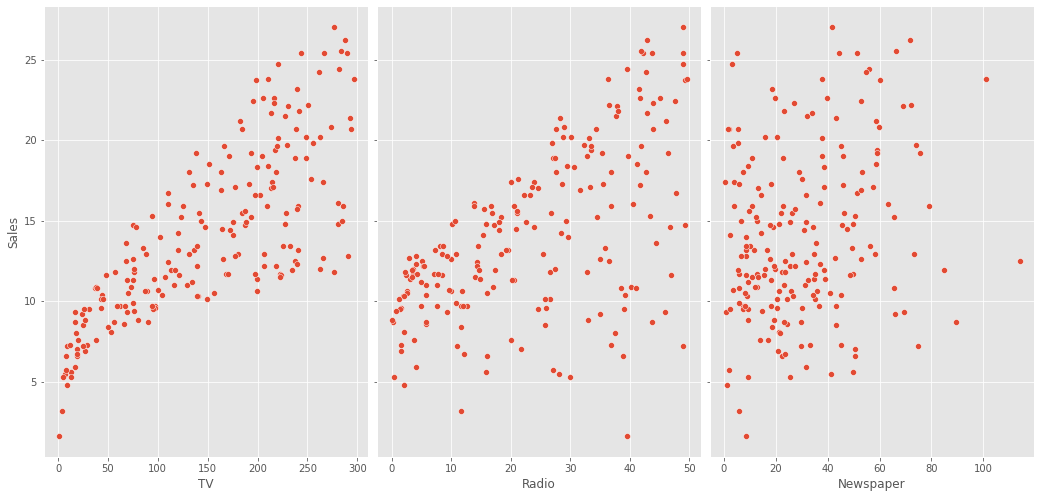

In [ ]:
sns.pairplot(advert, x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=7,aspect=0.7);

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                          advert[["TV", "Radio", "Newspaper"]],
                                          advert.Sales,
                                          test_size=0.3,
                                          random_state = 42 )


In [ ]:
len( X_train )

140

In [ ]:
len( X_test )

60

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg = LinearRegression()

In [ ]:
linreg.fit( X_train, y_train )

LinearRegression()

In [ ]:
linreg.intercept_

2.7089490925159065

In [ ]:
linreg.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [ ]:
list( zip( ["TV", "Radio", "Newspaper"], list( linreg.coef_ ) ) )

[('TV', 0.04405928095746522),
 ('Radio', 0.19928749689893954),
 ('Newspaper', 0.006882452222275487)]

In [ ]:
y_pred = linreg.predict( X_test )

In [ ]:
test_pred_df = pd.DataFrame( { 'actual': y_test,
                            'predicted': np.round( y_pred, 2),
                            'residuals': y_test - y_pred } )

In [ ]:
test_pred_df.sample(10)

,actual,predicted,residuals
96,11.7,12.15,-0.453176
45,14.9,15.12,-0.224495
172,7.6,7.70,-0.095191
95,16.9,16.57,0.334604
122,11.6,13.16,-1.563884
16,12.5,13.77,-1.274690
186,10.3,9.46,0.843204
93,22.2,21.54,0.664982
197,12.8,12.40,0.395137
98,25.4,24.26,1.144835


In [ ]:
from sklearn import metrics

In [ ]:
r2 = metrics.r2_score( y_train, linreg.predict(X_train) )
print("R Sqaured: ", r2)

R Sqaured:  0.9055159502227753


In [ ]:
mse = metrics.mean_squared_error( y_test, y_pred )

In [ ]:
rmse = round( np.sqrt(mse), 2 )
print("RMSE: ", rmse)

RMSE:  1.95
